# DineSight: 
## A Zomato-Based Exploratory Analysis of Bengaluru's Food Trends

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv(r"C:\Users\KIIT\Downloads\Zomato\zomato.csv")
print(df.shape)
print(df.info())
print(df.describe())

(51717, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list       

In [12]:
# Dropping unnecessary columns if any
df = df.drop_duplicates()
df.dropna(subset=['rate', 'location', 'cuisines', 'approx_cost(for two people)'], inplace=True)

# Clean 'rate' column (e.g., '4.1/5' -> 4.1)
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean 'approx_cost(for two people)' column (e.g., '₹300' -> 300)
df['cost'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Drop missing ratings
df.dropna(subset=['rate'], inplace=True)

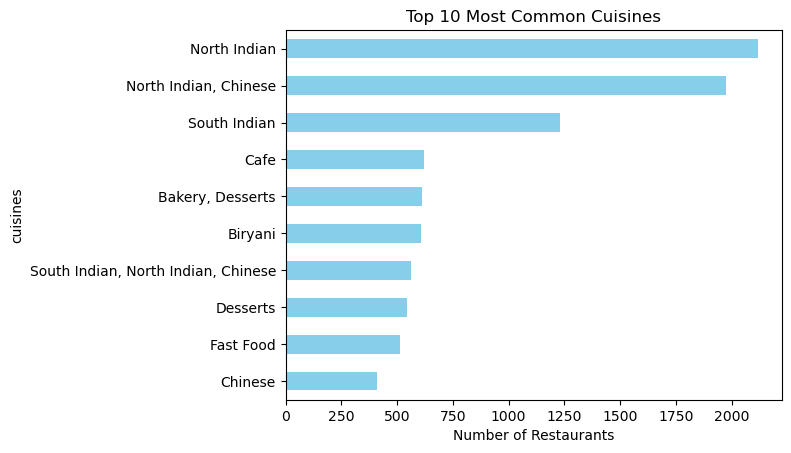

In [16]:
# Most Common Cuisines
top_cuisines = df['cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.gca().invert_yaxis()
plt.show()

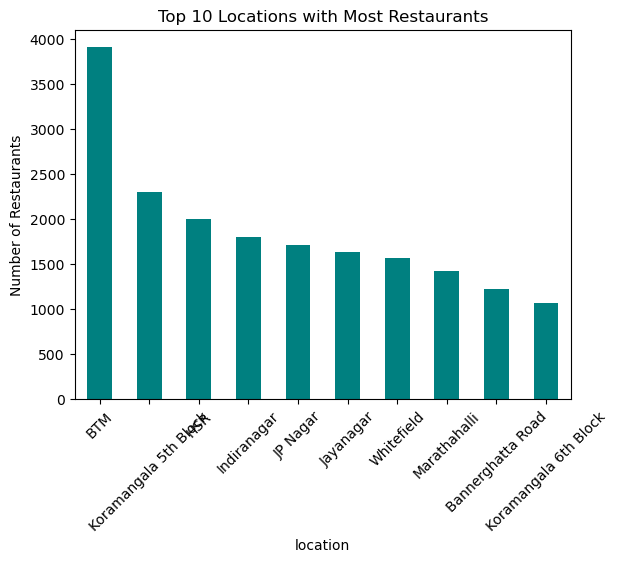

In [18]:
# Top locations
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='bar', color='teal')
plt.title('Top 10 Locations with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

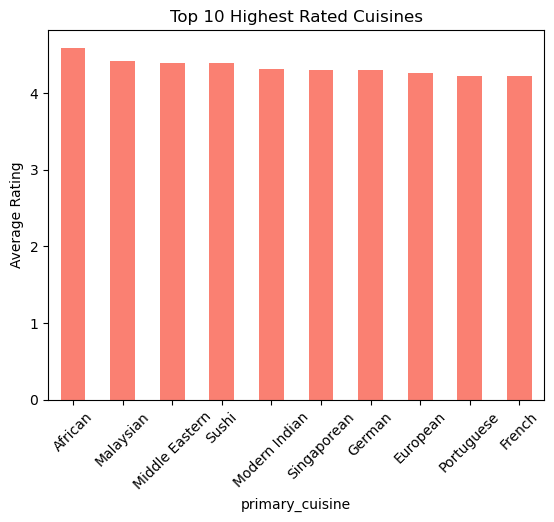

In [56]:
# Average rating per cuisine
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0])
avg_cuisine_rating = df.groupby('primary_cuisine')['rate'].mean().sort_values(ascending=False).head(10)
avg_cuisine_rating.plot(kind='bar', color='salmon')
plt.title('Top 10 Highest Rated Cuisines')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


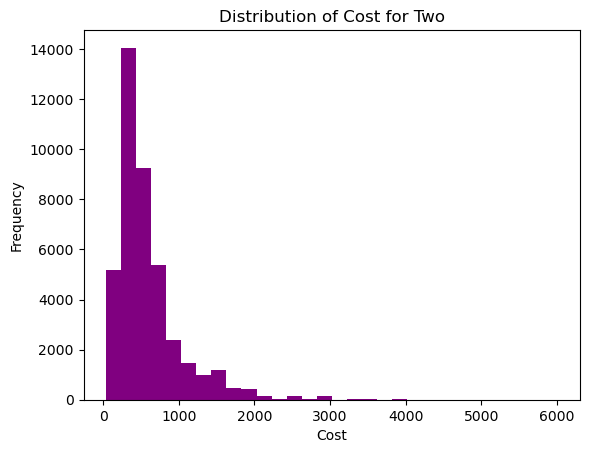

In [30]:
# Histogram of cost
plt.hist(df['cost'], bins=30, color='purple')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

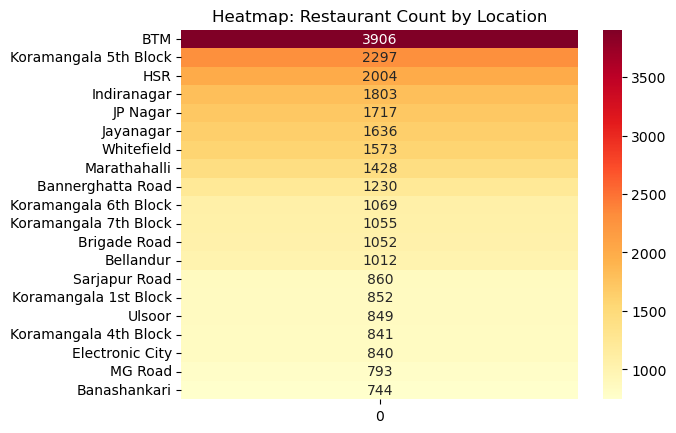

In [32]:
# Heatmap of restaurant count by location
location_counts = df['location'].value_counts().head(20)
sns.heatmap(location_counts.values.reshape(-1, 1), annot=True, fmt='g', cmap='YlOrRd',
            yticklabels=location_counts.index)
plt.title('Heatmap: Restaurant Count by Location')
plt.show()

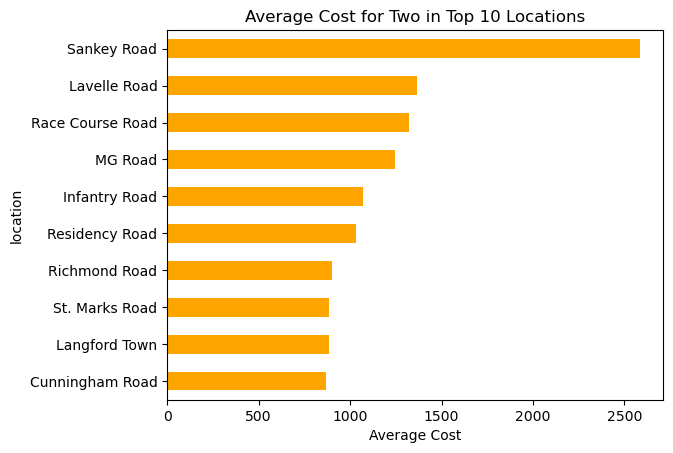

In [34]:
# Avg. cost in top 10 locations
avg_cost_location = df.groupby('location')['cost'].mean().sort_values(ascending=False).head(10)
avg_cost_location.plot(kind='barh', color='orange')
plt.title('Average Cost for Two in Top 10 Locations')
plt.xlabel('Average Cost')
plt.gca().invert_yaxis()
plt.show()

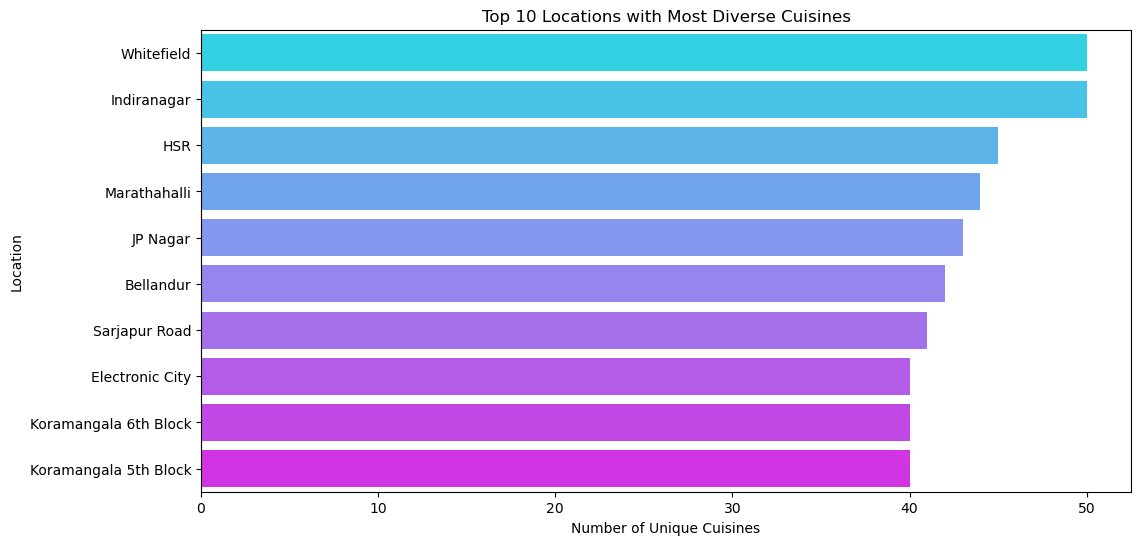

In [11]:
# Cuisine Diversity by Location
df['primary_cuisine'] = df['cuisines'].apply(lambda x: str(x).split(',')[0].strip())

# Group by location and count unique primary cuisines
diverse_cuisines = df.groupby('location')['primary_cuisine'].nunique().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=diverse_cuisines.values, y=diverse_cuisines.index, palette='cool')
plt.title('Top 10 Locations with Most Diverse Cuisines')
plt.xlabel('Number of Unique Cuisines')
plt.ylabel('Location')
plt.show()


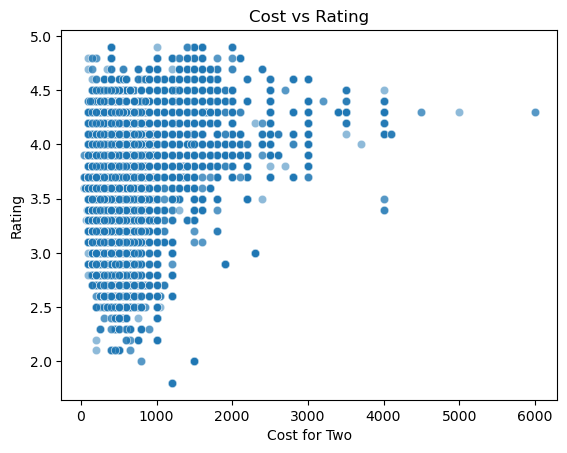

In [36]:
# Relation between price and rating
sns.scatterplot(data=df, x='cost', y='rate', alpha=0.5)
plt.title('Cost vs Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

Affordable High-Rated Restaurants: 565


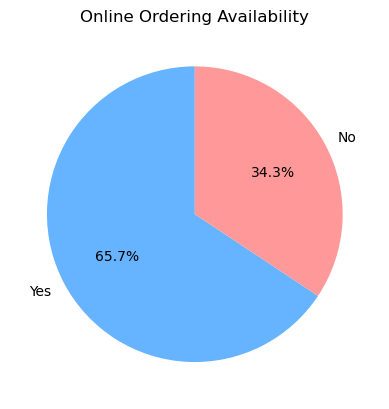

In [38]:
# Affordable restaurants with high ratings
affordable = df[(df['cost'] < 300) & (df['rate'] > 4.0)]
print("Affordable High-Rated Restaurants:", affordable.shape[0])
# Online Delivery
online_delivery = df['online_order'].value_counts()
online_delivery.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Online Ordering Availability')
plt.ylabel('')
plt.show()

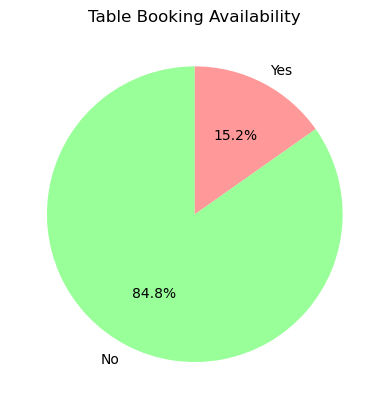

In [44]:
# Table Booking
table_booking = df['book_table'].value_counts()
table_booking.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ff9999'])
plt.title('Table Booking Availability')
plt.ylabel('')
plt.show()

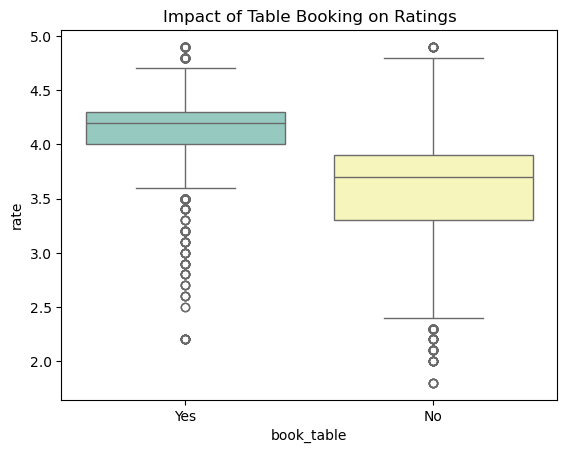

In [48]:
# Does table booking affect rating?
sns.boxplot(x='book_table', y='rate', data=df, palette='Set3')
plt.title('Impact of Table Booking on Ratings')
plt.show()

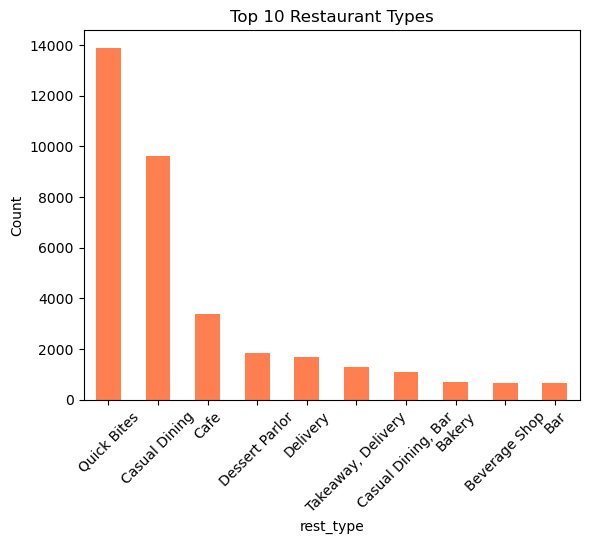

In [50]:
# Types of restaurants
df['rest_type'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Restaurant Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

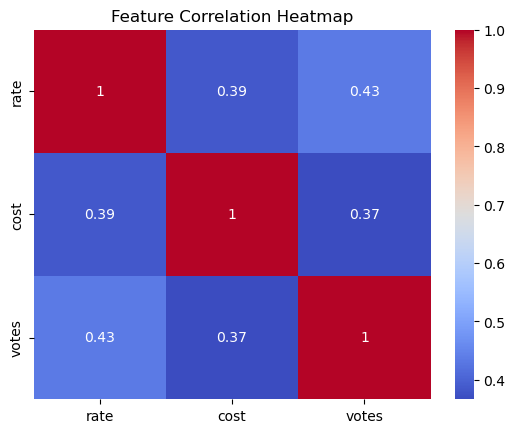

In [52]:
# Correlation heatmap
sns.heatmap(df[['rate', 'cost', 'votes']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

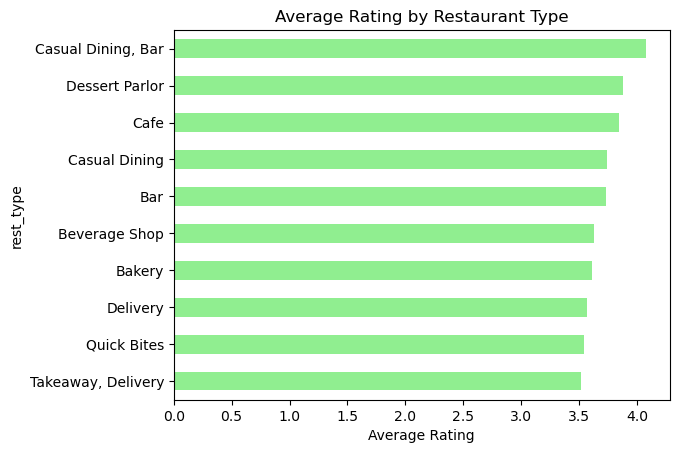

In [54]:
# Ratings by restaurant type
top_types = df['rest_type'].value_counts().head(10).index
type_rating = df[df['rest_type'].isin(top_types)].groupby('rest_type')['rate'].mean().sort_values()
type_rating.plot(kind='barh', color='lightgreen')
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Average Rating')
plt.show()

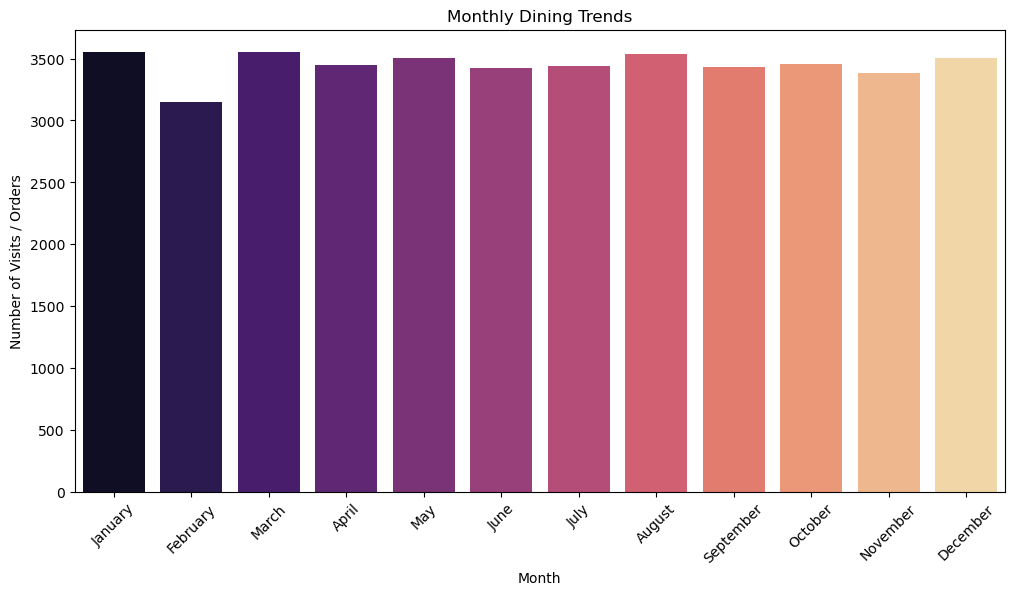

In [29]:
# Extract month from timestamp
df['month'] = df['timestamp'].dt.strftime('%B')  # Full month name

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_trend = df['month'].value_counts().reindex(month_order)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='magma')
plt.title('Monthly Dining Trends')
plt.xlabel('Month')
plt.ylabel('Number of Visits / Orders')
plt.xticks(rotation=45)
plt.show()


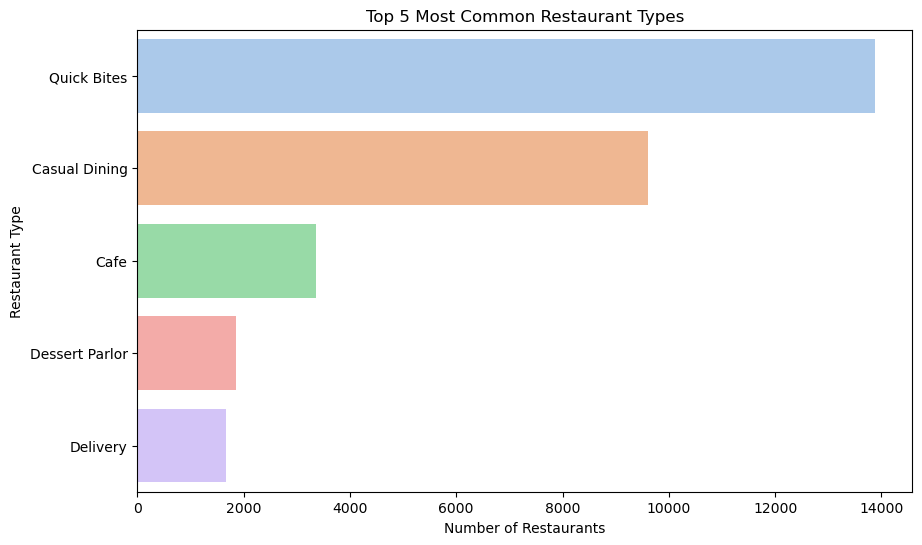

In [72]:
# Get top 5 most common restaurant types
top_5_types = df['rest_type'].value_counts().nlargest(5).index

# Filter dataset to only include top 5 types
df_top_types = df[df['rest_type'].isin(top_5_types)]

# Plot countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_types, y='rest_type', order=top_5_types, palette='pastel')
plt.title('Top 5 Most Common Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

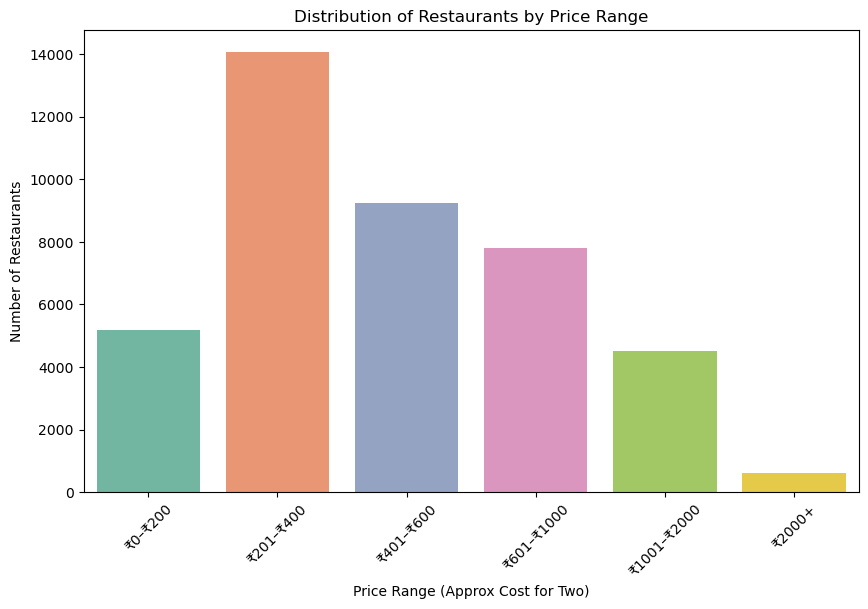

In [66]:
# Define bins for cost ranges
bins = [0, 200, 400, 600, 1000, 2000, df['cost'].max()]
labels = ['₹0–₹200', '₹201–₹400', '₹401–₹600', '₹601–₹1000', '₹1001–₹2000', '₹2000+']

# Create a new column for price range category
df['price_range'] = pd.cut(df['cost'], bins=bins, labels=labels, include_lowest=True)

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', order=labels, palette='Set2')
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range (Approx Cost for Two)')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

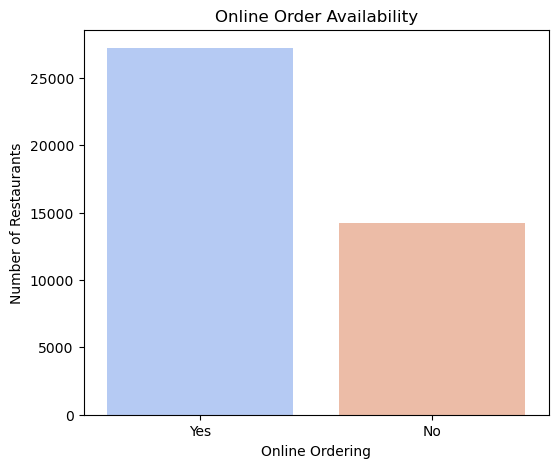

In [68]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='online_order', palette='coolwarm')
plt.title('Online Order Availability')
plt.xlabel('Online Ordering')
plt.ylabel('Number of Restaurants')
plt.show()

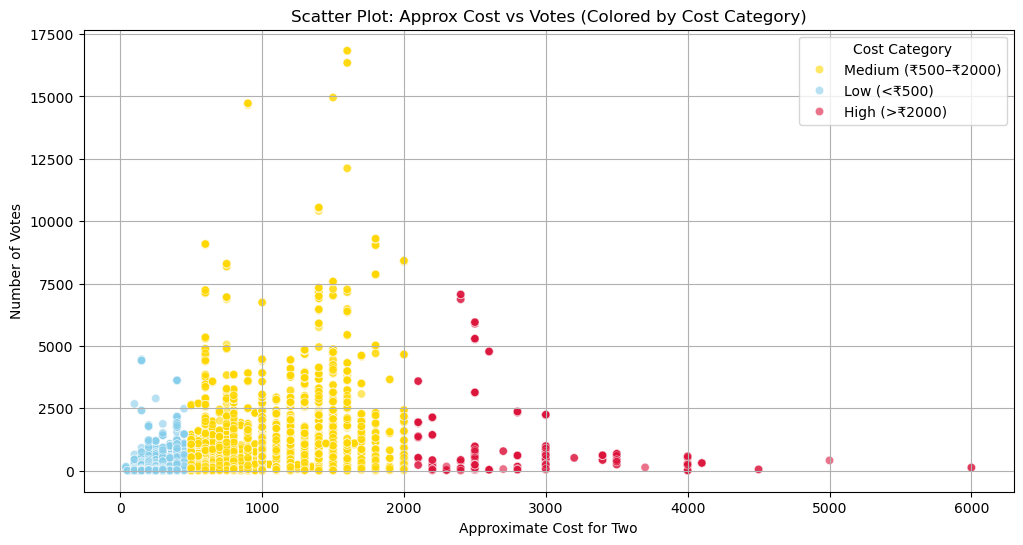

In [70]:
def cost_category(cost):
    if cost < 500:
        return 'Low (<₹500)'
    elif 500 <= cost <= 2000:
        return 'Medium (₹500–₹2000)'
    else:
        return 'High (>₹2000)'

df['cost_category'] = df['cost'].apply(cost_category)

# Plotting with hue for different cost ranges
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='cost', y='votes', hue='cost_category',
                palette={'Low (<₹500)': 'skyblue', 'Medium (₹500–₹2000)': 'gold', 'High (>₹2000)': 'crimson'},
                alpha=0.6)

plt.title('Scatter Plot: Approx Cost vs Votes (Colored by Cost Category)')
plt.xlabel('Approximate Cost for Two')
plt.ylabel('Number of Votes')
plt.legend(title='Cost Category')
plt.grid(True)
plt.show()